# Sensor Data Fusion 
Lecturer: Prof. Baum \
Tutor: Kolja Thormann\
Semester: Winter 21/22

## Homework 6

Consider again the setup of the Silly Estimator exercise with $x \sim \mathcal{N}(\mu\_1, \Sigma\_1)$ and $y = x + e$ with $e \sim \mathcal{N}(\mu\_2, \Sigma\_2)$.


---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

---
### a)

Write a function which calculates a possible value for $x$ based on its distribution and then generates a measurement from the value using the measurement noise.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def draw_sample(mean_x, var_x, mean_e, var_e, sample_count):
    """
    Function that draws a sample measurement.
    The parameters for this function consist of the parameters for the normal distribution of x and the normal distribution 
    of the additive noise.
    
    The function should return a single measurement ("y") and the true drawn value from the distribution ("x"). 
    :param mean_x: Mean of the gaussian distribution for x
    :param var_x: Variance of the gaussian distribution for x
    :param mean_e: Mean of the gaussian distriubtion for e
    :param var_e: Variance of the gaussian distribution for e:
    :return: (y,x) - a single measurement y with its true (original) value x
    """

    # === YOUR CODE HERE ===

    y = []
    x = []

    for curr_run in range(sample_count):
        curr_x = np.random.multivariate_normal(mean_x, var_x)
        curr_e = np.random.multivariate_normal(mean_e, var_e)

        x.append(curr_x)
        y.append(curr_x + curr_e)

    # === END OF YOUR CODE ===

    return np.array(y), np.array(x)

visualize a given list of points

In [10]:
def init_subplots():
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    return ax

def visualize_points(ax, points, color, label):
    x_vals = points[:, 0]
    y_vals = points[:, 1]

    plt.scatter(x_vals, y_vals, color=color, label=label, s=5, alpha=0.05)

    cov = np.cov(points.T)
    mean = np.mean(points, axis=0)

    eig_vals, eig_vecs = np.linalg.eig(cov)
    psi = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])
    ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color, linewidth=1.5)
    ax.add_artist(ell)


---
### b)

Consider the natural estimator $\theta_n(y) = y$. Calculate the empirical mean square error of 1000 runs using this estimator and compare it with the analystic solution.

__c)__ Repeat the process with the sillty estimator $\theta_s(y) = 0$


In [11]:
def theta_s(y):
    """
    Function that represents the silly estimator.

    This function should return a single value, which represents the result of the estimator.
    :param y: The measurement y
    :return: The estimate corresponding to the measurement given as input
    """
    # === YOUR CODE HERE ===

    result = np.zeros(y.shape)

    # === END OF YOUR CODE ===

    return result


def theta_n(y):
    """
    Function that represents the natural estimator.
    
    This function should return a single value, which represents the result of the estimator.
    :param y: The measurement y
    :return: The estimate corresponding to the measurement given as input
    """
    # === YOUR CODE HERE ===

    result = y

    # === END OF YOUR CODE ===

    return result

In [12]:
def empirical_mean_square_error(estimates_y, samples_x):
    """
    Function that calculates the empirical MSE for a given estimator and a set number of runs, using the draw_sample function
    defined above.
    
    The function should return a single value, which is the MSE over all runs for the given estimator.
    :param estimator: A function that, given a single measurement, returns an estimated true value
    :param n_runs: How many runs to take the MSE over
    :return: MSE, the mean squared error over all runs
    """
    # === YOUR CODE HERE ===

    errors = []
    for (curr_estimate, curr_sample) in zip(estimates_y, samples_x):
        errors.append((np.linalg.norm(curr_estimate - curr_sample))**2)
    MSE = np.average(np.array(errors))

    # === END OF YOUR CODE ===

    return MSE

Empirical MSE for the natural estimator: 
1.8046176253627855


/tmp/ipykernel_41827/957596436.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color, linewidth=1.5)


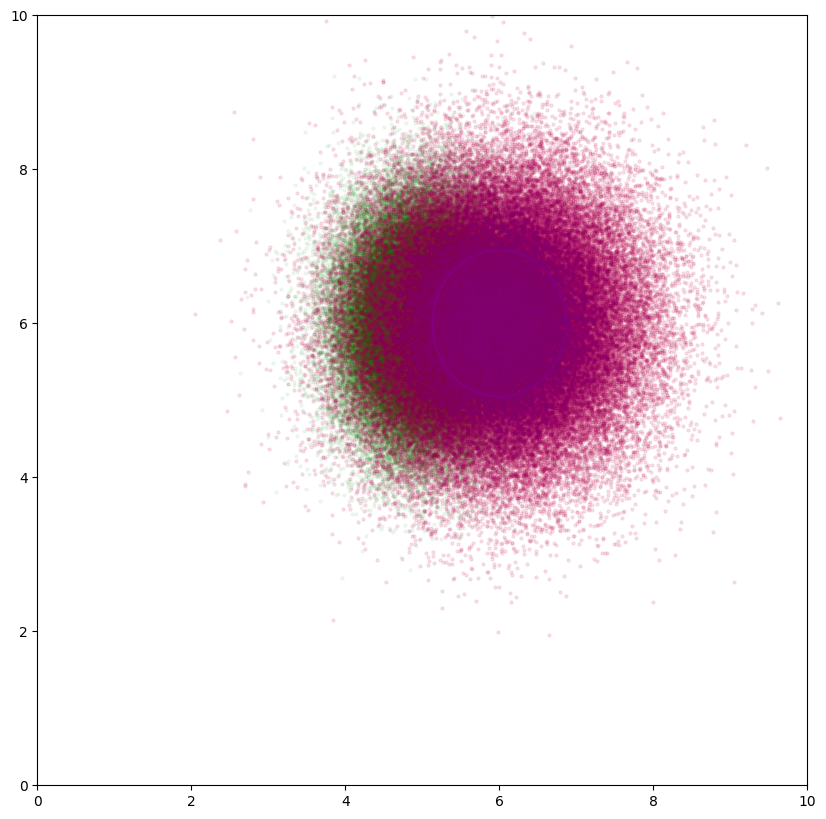

In [13]:
mean_x = [5, 6]
var_x = [[0.25, 0], [0, 0.6]]
mean_e = [1, 0]
var_e =  [[0.5, 0], [0, 0.3]]

samples_y, samples_x = draw_sample(mean_x, var_x, mean_e, var_e, 100000)
estimates = theta_n(samples_y)

# Calculate the MSE for the natural estimator
empirical_MSE_natural = empirical_mean_square_error(estimates, samples_x)

print("Empirical MSE for the natural estimator: ")
print(empirical_MSE_natural)

ax = init_subplots()
visualize_points(ax, samples_x, 'green', 'samples_x')
visualize_points(ax, samples_y, 'red', 'samples_y')
visualize_points(ax, estimates, 'purple', 'estimates')

ax.set_aspect('equal')
plt.show()


Compare the result of the empirical testing with the analytic solution:

In [20]:
mean_theta_y = np.array(mean_x) + np.array(mean_e)
bias = mean_x - mean_theta_y

trace_error_cov = np.trace(var_e)
bias_matrix = np.array([bias]).T @ np.array([bias])
trace_bias = np.trace(bias_matrix)
bmse = trace_error_cov + trace_bias

print("bmse: ", bmse)

bmse:  1.8


---
__c)__ Repeat the process with the sillty estimator $\theta_s(y) = 0$

In [15]:
samples_y, samples_x = draw_sample(mean_x, var_x, mean_e, var_e, 10000)
estimates = theta_s(samples_y)

# Calculate the MSE for the silly estimator using the same function as before
empirical_MSE_silly = empirical_mean_square_error(estimates, samples_x)

print("Empirical MSE for the silly estimator: ")
print(empirical_MSE_silly)

Empirical MSE for the silly estimator: 
61.89235643039254


Compare the result of the empirical testing with the analytic solution, this time for $\theta_s$:

=== YOUR ANSWER HERE ===


In [16]:
mean_theta_y = np.zeros(2)
bias = mean_theta_y - mean_x
trace_error_cov = np.trace(var_e)
bias_matrix = np.array([bias]).T @ np.array([bias])
trace_bias = np.trace(bias_matrix)
bmse = trace_error_cov + trace_bias

print("bmse: ", bmse)

bmse:  61.8
